<a href="https://colab.research.google.com/github/sureshbalajiv/StockPricePrediction_ML/blob/main/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd
import os

In [2]:
# Downloading S&P 500 Price Data
sp500 = yf.Ticker("^GSPC")

In [3]:
sp500 = sp500.history(period="max")

In [4]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-05-05 00:00:00-04:00,4084.729980,4147.020020,4084.729980,4136.250000,4186270000,0.0,0.0
2023-05-08 00:00:00-04:00,4136.979980,4142.299805,4123.810059,4138.120117,3641640000,0.0,0.0
2023-05-09 00:00:00-04:00,4124.250000,4130.350098,4116.649902,4119.169922,3810140000,0.0,0.0


In [5]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-04-28 00:00:00-04:00', '2023-05-01 00:00:00-04:00',
               '2023-05-02 00:00:00-04:00', '2023-05-03 00:00:00-04:00',
               '2023-05-04 00:00:00-04:00', '2023-05-05 00:00:00-04:00',
               '2023-05-08 00:00:00-04:00', '2023-05-09 00:00:00-04:00',
               '2023-05-10 00:00:00-04:00', '2023-05-11 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=23955, freq=None)

## Cleaning and Visualizing Stock Data

<Axes: xlabel='Date'>

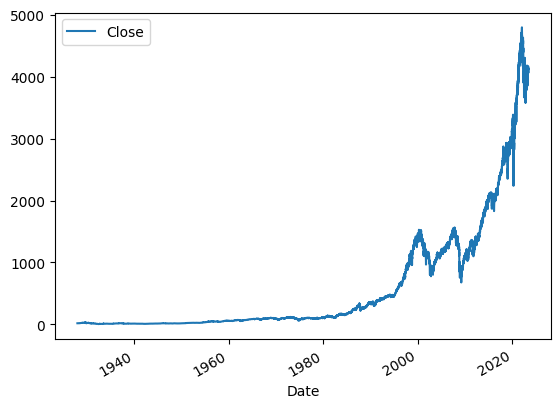

In [6]:
sp500.plot.line(y="Close", use_index=True)

In [7]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [8]:
## Setting Up Our Target for Machine Learning

## Target is whether the stock will go up or down



## Setting Up Our Target for Machine Learning

The target we need to setup is whether the stock price will go up tomorrow.

That, means the Tomorrow price needs to be greater than the today's close price.

Hence, an additional column called Tomorrow is created with the value assigned from the next day closing price.

pandas shift method is used to shift the data of close.

In [9]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [10]:
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000


In [11]:
# creating the Target Parameter by checking whether Tomorrow price is greater than today close
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [12]:
sp500.head()


,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0


In [13]:
# pandas loc method is used to locate all data only after 1990-01-01
sp500 = sp500.loc["1990-01-01":].copy()

In [14]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-05-05 00:00:00-04:00,4084.729980,4147.020020,4084.729980,4136.250000,4186270000,4138.120117,1
2023-05-08 00:00:00-04:00,4136.979980,4142.299805,4123.810059,4138.120117,3641640000,4119.169922,0
2023-05-09 00:00:00-04:00,4124.250000,4130.350098,4116.649902,4119.169922,3810140000,4137.640137,1


In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

Time series data - no cross validation - data leakage - it will not take the time series nature of the data. In that case, we ll be using the future data to predict the past.


In [16]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])


In [17]:
import pandas as pd
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.46153846153846156

In [18]:
combined = pd.concat([test["Target"], preds], axis=1)

<Axes: xlabel='Date'>

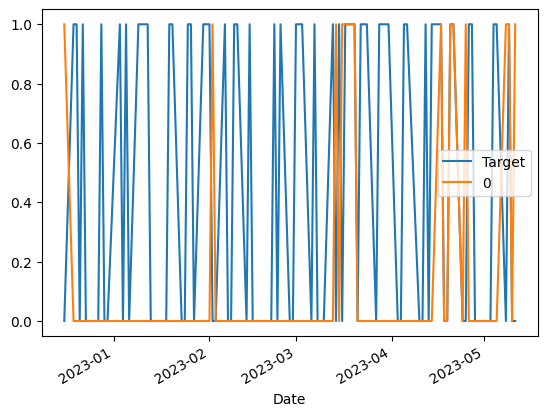

In [19]:
combined.plot()

## Building a Back Testing System

In [20]:
# RObust way to test the model

def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined



Implementing Backtesting

In [21]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [22]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [23]:
predictions = backtest(sp500, model, predictors)

In [24]:
predictions["Predictions"].value_counts()

0    3422
1    2483
Name: Predictions, dtype: int64

In [25]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5279903342730567

In [26]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.533616
0    0.466384
Name: Target, dtype: float64

## Adding New Predictors

In [27]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

In [28]:
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])

In [29]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-05 00:00:00-04:00,4084.729980,4147.020020,4084.729980,4136.250000,4186270000,4138.120117,1,1.009153,1.0,1.005131,1.0,1.021944,30.0,1.044372,114.0,1.106179,532.0
2023-05-08 00:00:00-04:00,4136.979980,4142.299805,4123.810059,4138.120117,3641640000,4119.169922,0,1.000226,2.0,1.007042,2.0,1.022168,31.0,1.044689,115.0,1.106301,533.0
2023-05-09 00:00:00-04:00,4124.250000,4130.350098,4116.649902,4119.169922,3810140000,4137.640137,1,0.997705,1.0,1.002450,2.0,1.017366,30.0,1.039781,114.0,1.100859,533.0


In [30]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [31]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [32]:
predictions = backtest(sp500, model, new_predictors)

In [33]:
predictions["Predictions"].value_counts()

0.0    4091
1.0     814
Name: Predictions, dtype: int64

In [34]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5687960687960688

In [35]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.543527
0    0.456473
Name: Target, dtype: float64

In [36]:
predictions

,Target,Predictions
Date,,
2003-11-14 00:00:00-05:00,0,0.0
2003-11-17 00:00:00-05:00,0,1.0
2003-11-18 00:00:00-05:00,1,1.0
2003-11-19 00:00:00-05:00,0,0.0
2003-11-20 00:00:00-05:00,1,1.0
...,...,...
2023-05-05 00:00:00-04:00,1,0.0
2023-05-08 00:00:00-04:00,0,0.0
2023-05-09 00:00:00-04:00,1,0.0
